In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

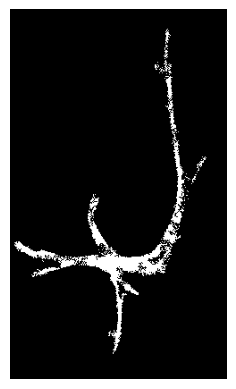

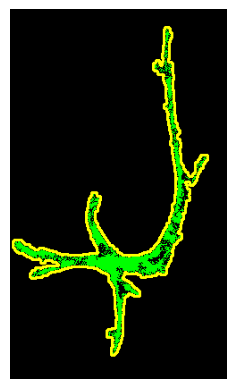

... [[[178  20]]

 [[179  22]]

 [[181  27]]

 [[221 164]]

 [[221 168]]

 [[192 257]]

 [[175 296]]

 [[120 383]]

 [[117 387]]

 [[113 387]]

 [[ 23 301]]

 [[  3 266]]

 [[  3 259]]

 [[173  21]]

 [[174  20]]]


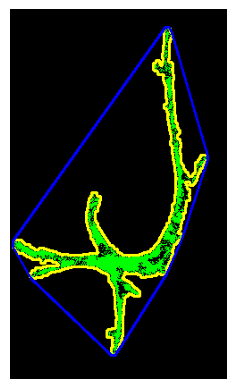

[[624]
 [622]
 [620]
 [545]
 [544]
 [481]
 [455]
 [379]
 [377]
 [376]
 [305]
 [259]
 [258]
 [  1]
 [  0]]


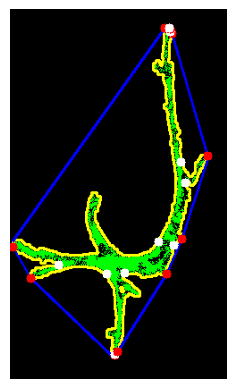

In [51]:
# Load the image
image = cv2.imread('2022.05.25_3s_4.1_Image 1_z23_ch2-coloc_method-Mean_part-All.tif')
image2 = image.copy()

# Convert the image to grayscale
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply thresholding to get binary image
# ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

b, g, r = cv2.split(image)
binary_image = np.where(g == 255, 255, 0).astype(np.uint8)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

# Find contours in the binary image
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# hull = cv2.convexHull(contours)
# cv2.drawContours(img, [hull], -1, (0, 255, 255), 2)
# cv2.imshow("hull", img) 

contours, hierarchy = cv2.findContours(cv2.dilate(binary_image, np.ones((5, 5), np.uint8) , iterations=1), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours1 = max(contours, key=lambda x: cv2.contourArea(x))
cv2.drawContours(image, [contours1], -1, (255,255,0), 2)

plt.imshow(image)
plt.axis('off')
plt.show()

# x, y, w, h = cv2.boundingRect(contours1)
# cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 0)
hull = cv2.convexHull(contours1)
print('...', hull)
# for h in hull:
#     cv2.circle(image, h[0], 5, [255, 0, 0], -1)
cv2.drawContours(image, [hull], 0, (0, 0, 255), 2)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


hull = cv2.convexHull(contours1, returnPoints=False)
print(hull)
defects = cv2.convexityDefects(contours1, hull)
count_defects = 0
cv2.drawContours(image2, contours, -1, (255, 255, 0), 2)

for i in range(defects.shape[0]):
    s, e, f, d = defects[i, 0]
    start = tuple(contours1[s][0])
    end = tuple(contours1[e][0])
    far = tuple(contours1[f][0])
    # a = math.sqrt((end[0] - start[0]) ** 2 + (end[1] - start[1]) ** 2)
    # b = math.sqrt((far[0] - start[0]) ** 2 + (far[1] - start[1]) ** 2)
    # c = math.sqrt((end[0] - far[0]) ** 2 + (end[1] - far[1]) ** 2)
    # angle = math.acos((b ** 2 + c ** 2 - a ** 2) / (2 * b * c)) * 57

    # if angle <= 90:
    #     count_defects += 1
    #     # print(far)
    #     cv2.circle(image2, far, 10, [255, 0, 0], -1)

    cv2.line(image2, start, end, [0, 0, 255], 2)

    cv2.circle(image2, start, 5, [255, 0, 0], -1)
    cv2.circle(image2, far, 5, (255, 255, 255), -1)

# print(f"count {count_defects}")
plt.imshow(image2, cmap='gray')
plt.axis('off')
plt.show()


# defects = cv2.convexityDefects(contours, hull)

In [18]:
cv2.__version__

'4.9.0'